<a href="https://colab.research.google.com/github/Ahmed-Ashraf-Marzouk/data-mining-heart-attack/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [46]:
#imports 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, roc_auc_score, roc_curve, auc

In [21]:
!gdown "1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f"
!unrar x "./dataset.rar" -idq

Downloading...
From: https://drive.google.com/uc?id=1uDSWhhUBPFjjUJmsh4-FLiRM2AakrC8f
To: /content/dataset.rar
100% 3.82k/3.82k [00:00<00:00, 6.09MB/s]


Would you like to replace the existing file dataset/heart.csv
 11323 bytes, modified on 2021-03-22 09:41
with a new one
 11323 bytes, modified on 2021-03-22 09:41

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

# Data wrangling 

In [47]:
col_names = ['Age','Gender','CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Exang', 'Old_peak', 'Slope', 'CA', 'Thall', 'Output']
df = pd.read_csv('dataset/heart.csv', header = 0, names = col_names)
rearranged_col_names = ['Age', 'Gender', 'Exang', 'CA', 'CP', 'Trtbps', 'Chol', 'FBS', 'Rest_ecg', 'Thalach', 'Old_peak', 'Slope','Thall', 'Output']
df = df[rearranged_col_names]
df.head()
df.shape

(303, 14)

# Kmeans

## Standardization of continous data

In [48]:
y = df['Output']
features = df.iloc[:,0:-1]
#standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## K means model generation and prediction 

In [49]:
kmeans = KMeans(init="random", n_clusters= 2, n_init=10, max_iter=300, random_state=42)
y_predict = kmeans.fit_predict(scaled_features)

In [50]:
kmeans.inertia_
kmeans.n_iter_

10

In [51]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,

## Performance metrics 

In [52]:
confusion_matrix(y, y_predict)


array([[ 93,  45],
       [ 12, 153]])

In [53]:
accuracy_score(y,y_predict)


0.8118811881188119

In [54]:
f1_score(y, y_predict, average=None)

array([0.7654321 , 0.84297521])

# Kmeans with outlier removal

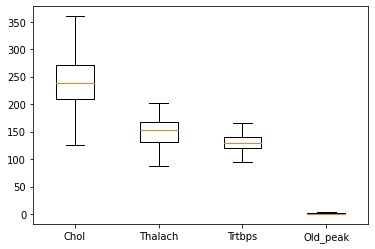

In [65]:
# Cleaned data after removing outliers
df_no_outliers = df.loc[df['Chol'] < 380]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Thalach'] > 80]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Trtbps'] < 170]
df_no_outliers = df_no_outliers.loc[df_no_outliers['Old_peak'] < 3.5]
arr = [df_no_outliers['Chol'].to_numpy(), df_no_outliers['Thalach'].to_numpy(), df_no_outliers['Trtbps'].to_numpy(), df_no_outliers['Old_peak'].to_numpy()]
plt.boxplot(arr)
plt.xticks([1, 2, 3, 4], ['Chol', 'Thalach', 'Trtbps', 'Old_peak'])
plt.show()

In [66]:
df_no_outliers.shape

(273, 14)

In [67]:
y = df_no_outliers['Output']
features = df_no_outliers
#standardization
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [68]:
kmeans = KMeans(init="random", n_clusters= 2, n_init=10, max_iter=300, random_state=42)
# kmeans.decision_function(scaled_features)
y_predict = kmeans.fit_predict(scaled_features)

In [69]:
kmeans.inertia_
kmeans.n_iter_

9

In [70]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

## Performance metrics with outlier removal 

In [71]:
confusion_matrix(y, y_predict)


array([[102,  14],
       [  7, 150]])

In [72]:
accuracy_score(y,y_predict)


0.9230769230769231

In [73]:
f1_score(y, y_predict, average=None)

array([0.90666667, 0.93457944])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_ranking.py:1001: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning,


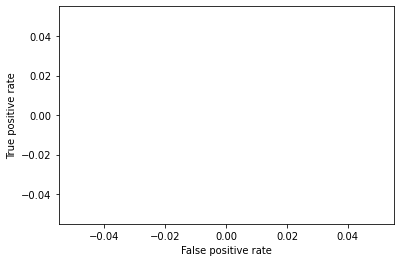

In [74]:
fpr, tpr, thresholds = roc_curve(y, y_predict, pos_label=2)
auc_kmeans = auc(fpr, tpr)
plt.plot(fpr, tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()